In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


#Data Preperation

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Selim/data.csv')

In [ ]:
df

,posting_id,created_date,sold_date,last_data_date,time_difference,situatution,posting_update_date,update_counts,prices,last_price,price_difference,pricupdate_counts,last_update
0,8329213,05.06.2020,01.09.2020,21.09.2020,88,0,06.06.2020,2,"560,000;560,000;560,000;560,000;560,000;560,00...",560000,0,0,06.06.2020
1,8000216,16.02.2020,01.09.2020,21.09.2020,198,0,7.03.2020;07.03.2020,3,"750,000;750,000;750,000;750,000;750,000;750,00...",750000,0,0,07.03.2020
2,8443581,03.07.2020,0,21.09.2020,80,1,28.07.2020;20.09.2020;20.07.2020;24.07.2020;07...,9,"725,000;725,000;725,000;725,000;725,000;725,00...",725000,0,0,21.09.2020
3,7981785,11.02.2020,01.09.2020,21.09.2020,203,0,11.02.2020,2,"350,000;350,000;350,000;350,000;350,000;350,00...",350000,0,0,11.02.2020
4,8274659,21.05.2020,0,21.09.2020,123,1,15.08.2020;22.07.2020;23.07.2020;29.07.2020;25...,11,"295,000;295,000;295,000;295,000;295,000;295,00...",295000,0,0,17.09.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,8047319,29.02.2020,01.09.2020,21.09.2020,185,0,07.07.2020;16.06.2020,3,"380,000;285,000",285000,-95000,1,07.07.2020
1023,4849717,02.01.2017,0,21.09.2020,1358,1,19.09.2020;15.08.2020;22.09.2020;22.07.2020;23...,13,"250,000;250,000;250,000;250,000;250,000;250,00...",250000,0,0,22.09.2020
1024,8119456,20.03.2020,0,21.09.2020,185,1,22.09.2020;20.07.2020;23.07.2020;22.07.2020;29...,11,"260,000;260,000;260,000;260,000;260,000;260,00...",260000,0,0,22.09.2020
1025,8386982,21.06.2020,01.09.2020,21.09.2020,72,0,21.06.2020;28.07.2020,3,"185,000;185,000;185,000;185,000;185,000;185,00...",185000,0,0,28.07.2020


In [3]:
df = df.loc[df['situatution'] == 0]
df = df.reset_index()

In [4]:
from datetime import datetime

last_update = []
for i in df['posting_update_date']:
    temp_dates = i.split(';')
    temp_dates.sort(key=lambda date: datetime.strptime(date, "%d.%m.%Y"))
    last_update.append(temp_dates[len(temp_dates)-1])
    
df['last_update'] = last_update

In [5]:
last_update_difference = []

for i in range(len(df['last_update'])):
    last_update_difference.append((datetime.strptime(df['sold_date'][i], "%d.%m.%Y") - datetime.strptime(df['last_update'][i], "%d.%m.%Y")).days)

df['last_update_difference'] = last_update_difference

In [ ]:
df

,index,posting_id,created_date,sold_date,last_data_date,time_difference,situatution,posting_update_date,update_counts,prices,last_price,price_difference,pricupdate_counts,last_update,last_update_difference
0,0,8329213,05.06.2020,01.09.2020,21.09.2020,88,0,06.06.2020,2,"560,000;560,000;560,000;560,000;560,000;560,00...",560000,0,0,06.06.2020,87
1,1,8000216,16.02.2020,01.09.2020,21.09.2020,198,0,7.03.2020;07.03.2020,3,"750,000;750,000;750,000;750,000;750,000;750,00...",750000,0,0,07.03.2020,178
2,3,7981785,11.02.2020,01.09.2020,21.09.2020,203,0,11.02.2020,2,"350,000;350,000;350,000;350,000;350,000;350,00...",350000,0,0,11.02.2020,203
3,6,8409803,25.06.2020,01.09.2020,21.09.2020,68,0,25.06.2020,2,"515,000;515,000;515,000;515,000;515,000;515,00...",515000,0,0,25.06.2020,68
4,7,8371132,17.06.2020,01.09.2020,21.09.2020,76,0,17.06.2020,2,"785,000;785,000;785,000;785,000;785,000;785,00...",785000,0,0,17.06.2020,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,1019,7981869,11.02.2020,13.08.2020,21.09.2020,184,0,11.02.2020,2,"300,000;300,000;300,000;300,000;300,000;300,00...",300000,0,0,11.02.2020,184
545,1020,8355549,14.06.2020,01.09.2020,21.09.2020,79,0,28.07.2020;20.07.2020;24.07.2020;07.08.2020;7....,8,"315,000;315,000;315,000;315,000;315,000;315,00...",315000,0,0,7.08.2020,25
546,1021,7701548,14.11.2019,01.09.2020,21.09.2020,292,0,25.04.2020,2,"340,000;340,000;340,000;340,000;340,000;340,000",340000,0,0,25.04.2020,129
547,1022,8047319,29.02.2020,01.09.2020,21.09.2020,185,0,07.07.2020;16.06.2020,3,"380,000;285,000",285000,-95000,1,07.07.2020,56


In [6]:
df = df.drop('index', axis=1)
df = df.drop('posting_id', axis=1)
df = df.drop('created_date', axis=1)
df = df.drop('sold_date', axis=1)
df = df.drop('last_data_date', axis=1)
df = df.drop('situatution', axis=1)
df = df.drop('posting_update_date', axis=1)
df = df.drop('prices', axis=1)
df = df.drop('last_update', axis=1)

df

,time_difference,update_counts,last_price,price_difference,pricupdate_counts,last_update_difference
0,88,2,560000,0,0,87
1,198,3,750000,0,0,178
2,203,2,350000,0,0,203
3,68,2,515000,0,0,68
4,76,2,785000,0,0,76
...,...,...,...,...,...,...
544,184,2,300000,0,0,184
545,79,8,315000,0,0,25
546,292,2,340000,0,0,129
547,185,3,285000,-95000,1,56


In [7]:
import numpy as np

y = []

for i in df['time_difference']:
    if i < 79:
        y.append(0)
    elif i >= 79 and i < 166:
        y.append(1)
    elif i >= 166 and i <= 195:
        y.append(2)
    elif i > 195 and i < 265:
        y.append(3)
    elif i >= 265:
        y.append(4)

y = np.array(y)
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4]), array([117, 111, 110, 108, 103]))

In [8]:
df = df.drop('time_difference', axis=1)
df = df.astype(int)
df

,update_counts,last_price,price_difference,pricupdate_counts,last_update_difference
0,2,560000,0,0,87
1,3,750000,0,0,178
2,2,350000,0,0,203
3,2,515000,0,0,68
4,2,785000,0,0,76
...,...,...,...,...,...
544,2,300000,0,0,184
545,8,315000,0,0,25
546,2,340000,0,0,129
547,3,285000,-95000,1,56


In [9]:
for i, j in enumerate(df['last_update_difference']):
    if j < 0:
        df['last_update_difference'][i] = 0
df

,update_counts,last_price,price_difference,pricupdate_counts,last_update_difference
0,2,560000,0,0,87
1,3,750000,0,0,178
2,2,350000,0,0,203
3,2,515000,0,0,68
4,2,785000,0,0,76
...,...,...,...,...,...
544,2,300000,0,0,184
545,8,315000,0,0,25
546,2,340000,0,0,129
547,3,285000,-95000,1,56


In [10]:
max = []
min = []

for i in range(5):
    max.append(df[df.columns[i]][0])
    min.append(df[df.columns[i]][0])
    for j in range(1, len(df)):
        if df[df.columns[i]][j] > max[i]:
            max[i] = df[df.columns[i]][j]
        if df[df.columns[i]][j] < min[i]:
            min[i] = df[df.columns[i]][j]

max, min

([16, 6000000, 420000, 3, 230], [2, 50000, -190000, 0, 0])

In [11]:
x = []
for j in range(len(df)):
    temp = []
    for i in range(5):
        temp.append((df[df.columns[i]][j] -  min[i]) / (max[i] - min[i]))
    x.append(temp)
x = np.array(x)
x.shape, y.shape

((549, 5), (549,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((411, 5), (138, 5), (411,), (138,))

#KNN

MAE  :  1.1376811594202898
MSE  :  1.6615864603496837


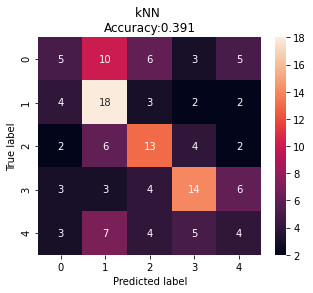

MAE  :  1.0942028985507246
MSE  :  1.6307729117982896


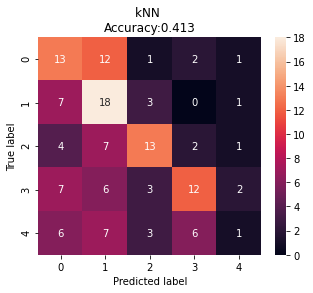

MAE  :  1.065217391304348
MSE  :  1.6038901982729186


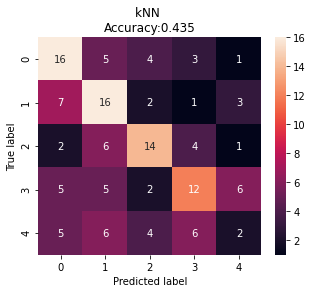

MAE  :  1.210144927536232
MSE  :  1.7795130420052185


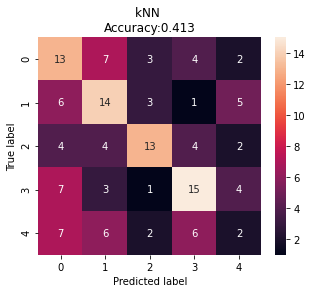

MAE  :  1.0942028985507246
MSE  :  1.6572196027063533


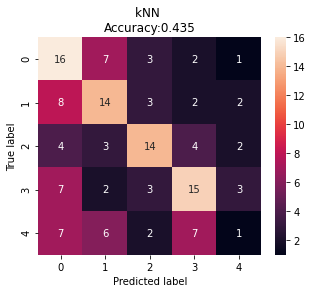

MAE  :  1.108695652173913
MSE  :  1.6307729117982896


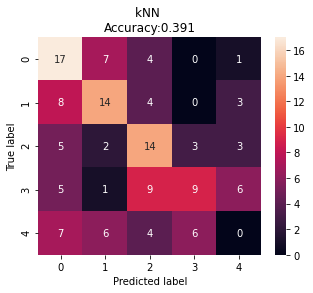

MAE  :  1.144927536231884
MSE  :  1.6767809048586373


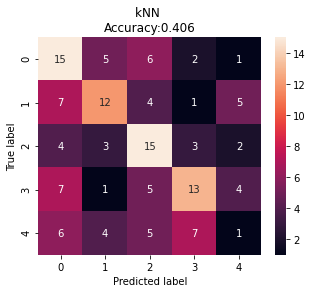

MAE  :  1.108695652173913
MSE  :  1.6832508230603465


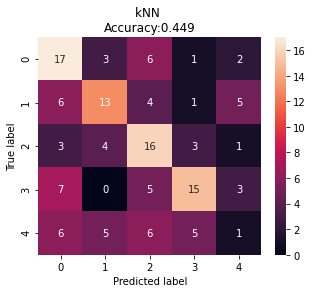

MAE  :  1.0724637681159421
MSE  :  1.6240939503059206


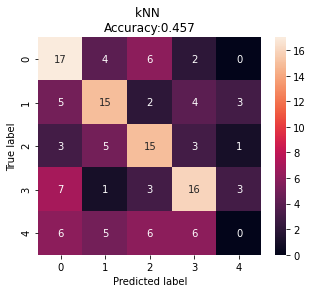

MAE  :  1.108695652173913
MSE  :  1.6440494368250116


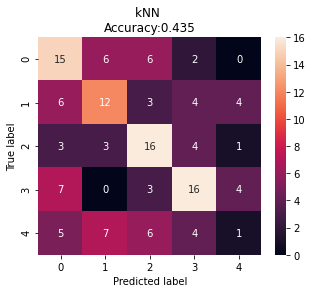

MAE  :  1.0942028985507246
MSE  :  1.6352103973123033


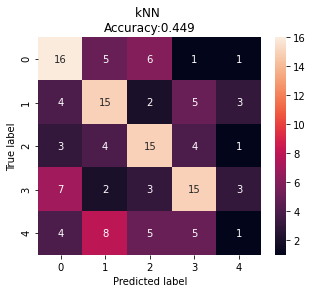

MAE  :  1.1304347826086956
MSE  :  1.6594044679962137


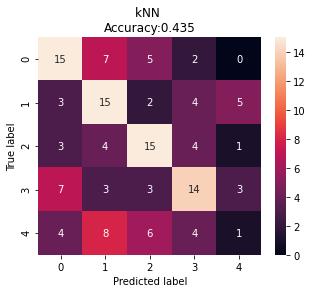

MAE  :  1.0579710144927537
MSE  :  1.6240939503059206


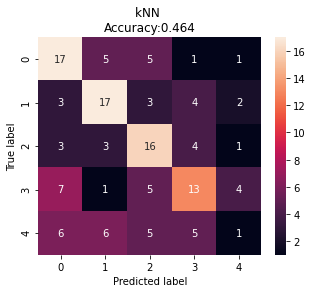

MAE  :  1.0579710144927537
MSE  :  1.6196260080021874


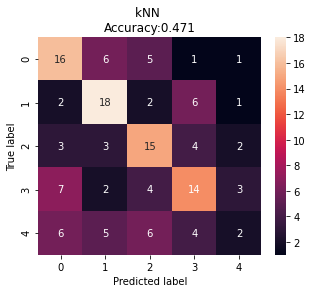

MAE  :  1.0072463768115942
MSE  :  1.5487255162351012


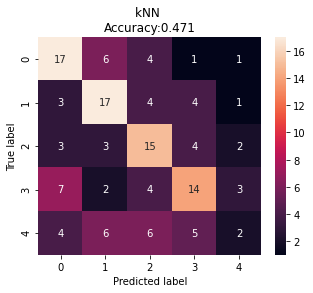

MAE  :  1.065217391304348
MSE  :  1.6173874084416224


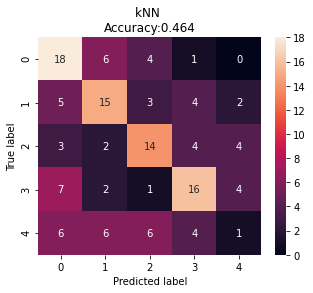

MAE  :  1.0724637681159421
MSE  :  1.6285496348111341


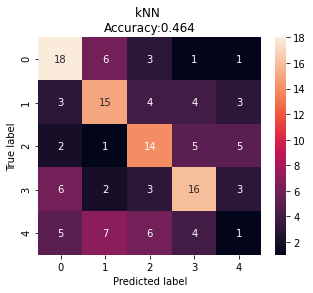

MAE  :  1.0797101449275361
MSE  :  1.6307729117982896


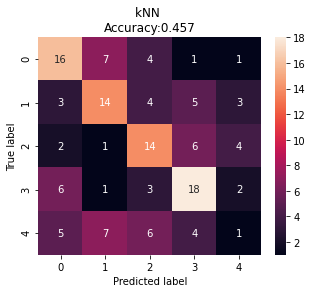

MAE  :  1.108695652173913
MSE  :  1.665941871387048


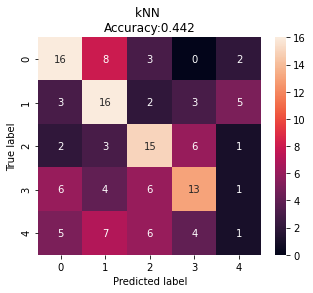

MAE  :  1.065217391304348
MSE  :  1.6307729117982896


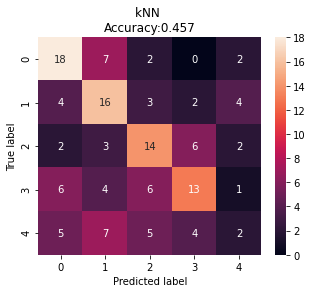

MAE  :  1.0724637681159421
MSE  :  1.6151457061744965


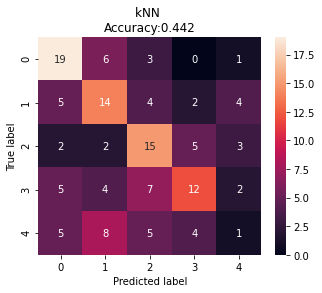

MAE  :  1.0144927536231885
MSE  :  1.5416911474750377


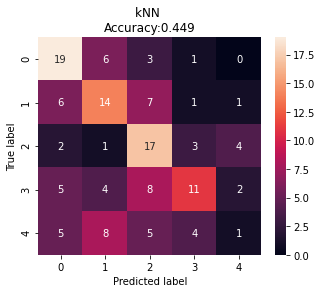

MAE  :  1.0797101449275361
MSE  :  1.6218615177038684


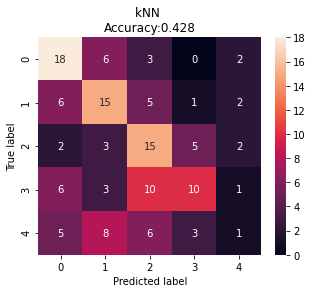

MAE  :  1.0869565217391304
MSE  :  1.6285496348111341


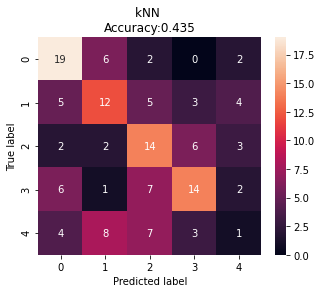

MAE  :  1.0144927536231885
MSE  :  1.5463842820677165


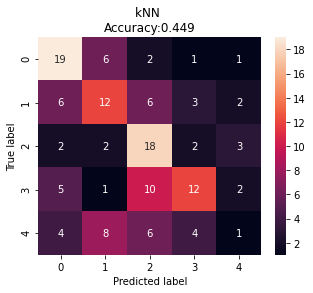

MAE  :  1.0869565217391304
MSE  :  1.6061476099435992


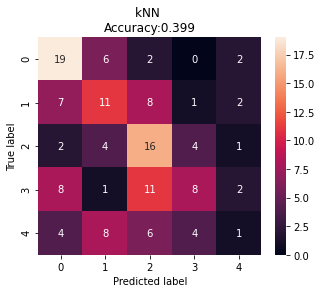

MAE  :  1.065217391304348
MSE  :  1.5902784370186174


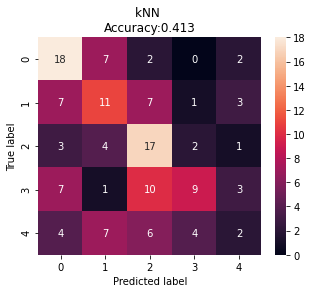

MAE  :  1.036231884057971
MSE  :  1.553397398691291


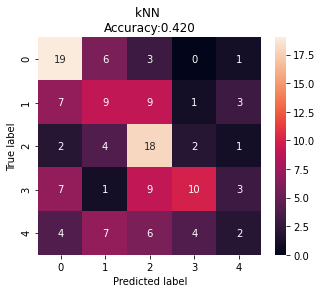

MAE  :  1.0797101449275361
MSE  :  1.6173874084416224


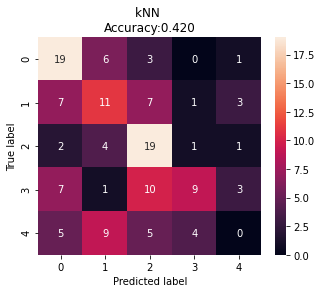

MAE  :  1.0434782608695652
MSE  :  1.5696394859782385


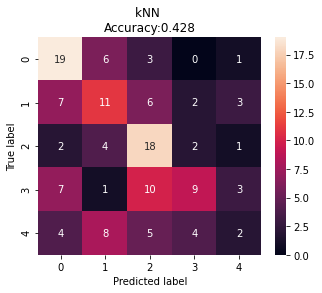

MAE  :  1.0217391304347827
MSE  :  1.553397398691291


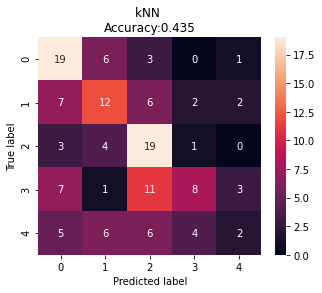

MAE  :  1.0
MSE  :  1.5036188231122245


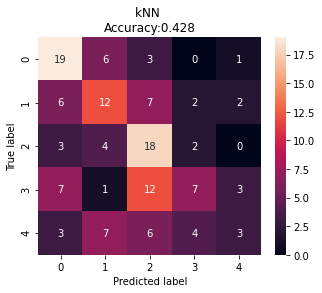

MAE  :  1.0144927536231885
MSE  :  1.5084304156442152


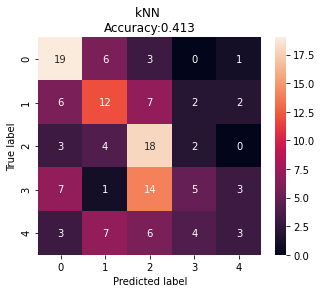

MAE  :  1.0144927536231885
MSE  :  1.4987917839360487


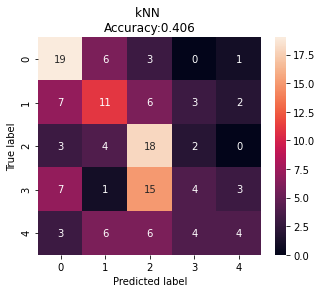

MAE  :  1.0869565217391304
MSE  :  1.5650160901149996


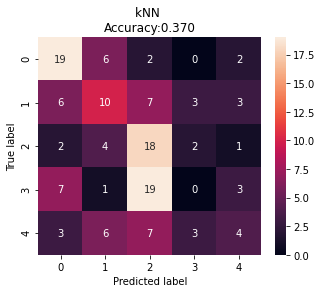

MAE  :  1.1304347826086956
MSE  :  1.6374246304150475


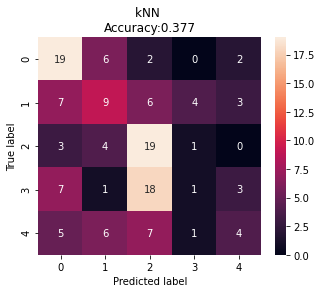

MAE  :  1.1159420289855073
MSE  :  1.6196260080021874


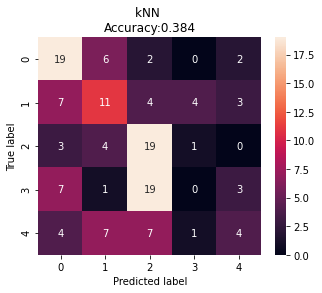

MAE  :  1.1376811594202898
MSE  :  1.6396358733271998


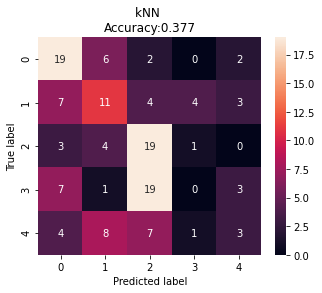

MAE  :  1.1521739130434783
MSE  :  1.6352103973123033


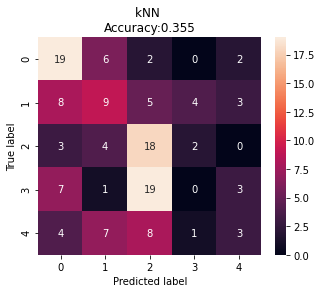

MAE  :  1.144927536231884
MSE  :  1.6550318531021113


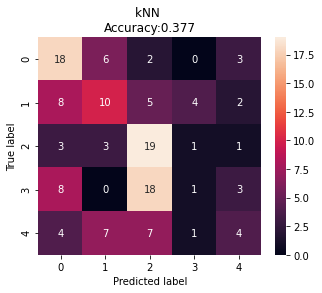

MAE  :  1.1594202898550725
MSE  :  1.6594044679962137


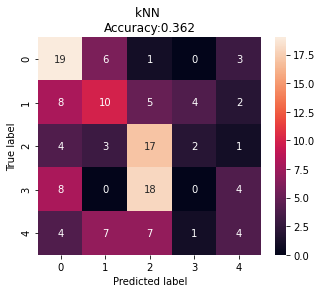

MAE  :  1.1231884057971016
MSE  :  1.6307729117982896


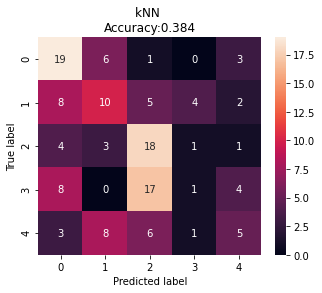

MAE  :  1.173913043478261
MSE  :  1.6418441381303657


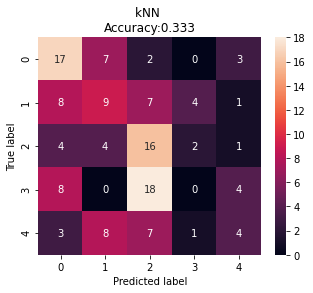

MAE  :  1.144927536231884
MSE  :  1.6285496348111341


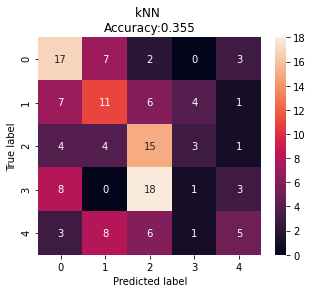

MAE  :  1.2391304347826086
MSE  :  1.7131207221604823


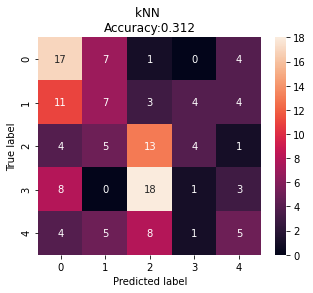

MAE  :  1.1666666666666667
MSE  :  1.6440494368250116


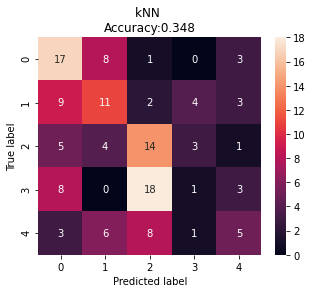

MAE  :  1.173913043478261
MSE  :  1.6550318531021113


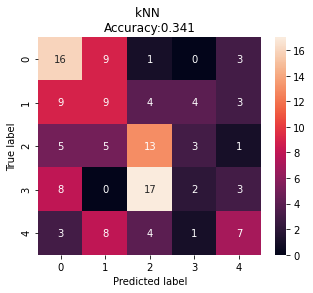

MAE  :  1.1594202898550725
MSE  :  1.6240939503059206


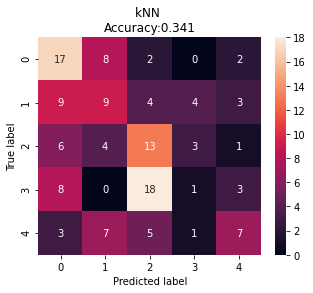

MAE  :  1.1956521739130435
MSE  :  1.6572196027063533


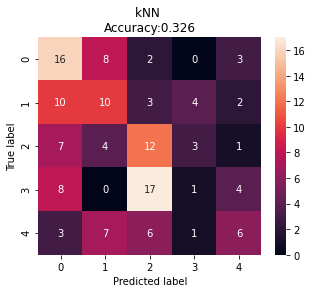

MAE  :  1.1594202898550725
MSE  :  1.6196260080021874


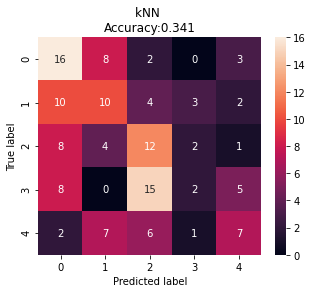

MAE  :  1.2826086956521738
MSE  :  1.7713500951026846


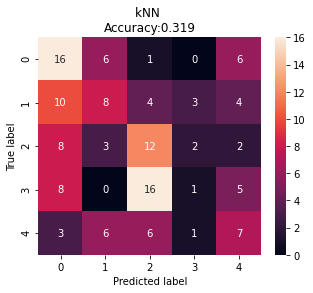

MAE  :  1.3115942028985508
MSE  :  1.8197786137051262


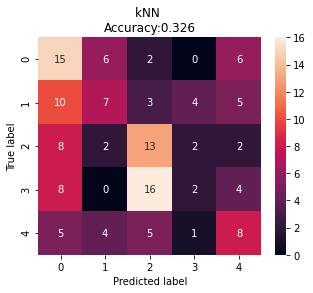

MAE  :  1.2826086956521738
MSE  :  1.7754362599213407


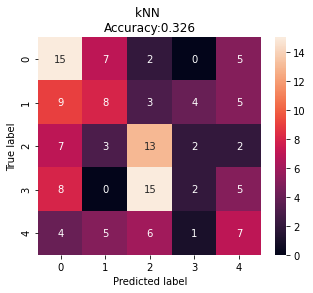

MAE  :  1.2681159420289856
MSE  :  1.763149356173184


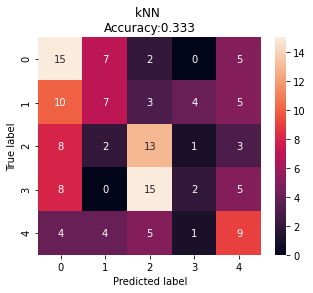

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

mae_e = []
mse_e = []
ac = []

for i in range(1,55):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train);
    y_pred = clf.predict(X_test) 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ac.append(accuracy_score(y_test, y_pred))
    error_mae = mean_absolute_error(y_test, y_pred)
    mae_e.append(error_mae)
    error_mse = mean_squared_error(y_test, y_pred, squared=False)
    mse_e.append(error_mse)
    print('MAE  : ', error_mae)
    print('MSE  : ', error_mse)
    plt.show()

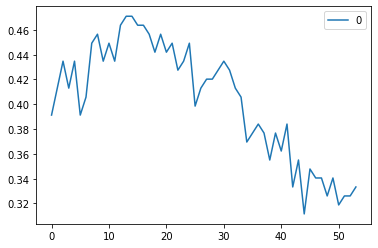

In [14]:
curve = pd.DataFrame(ac)
curve.plot()

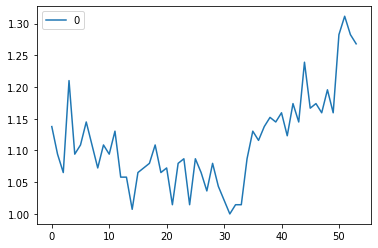

In [15]:
curve1 = pd.DataFrame(mae_e)
curve1.plot()

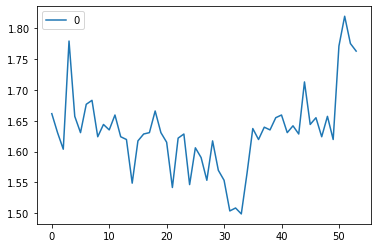

In [16]:
curve2 = pd.DataFrame(mse_e)
curve2.plot()

Accuracy :  0.47101449275362317
MAE  :  1.0072463768115942
MSE  :  1.5487255162351012


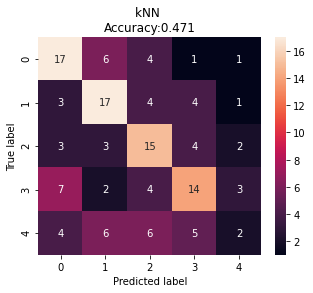

In [17]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('MAE  : ', mean_absolute_error(y_test, y_pred))
print('MSE  : ', mean_squared_error(y_test, y_pred, squared=False))
plt.show()

#Decision Tree

MAE  :  1.0434782608695652
MSE  :  1.5788456616111677


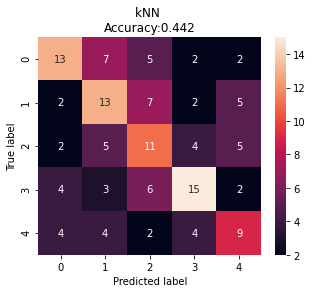

MAE  :  1.0579710144927537
MSE  :  1.5788456616111677


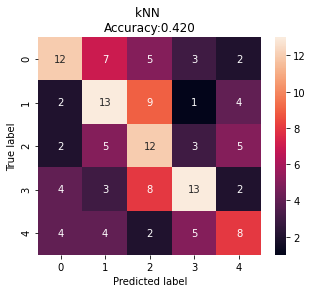

MAE  :  1.0869565217391304
MSE  :  1.6061476099435992


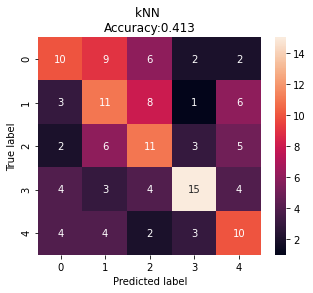

MAE  :  1.0217391304347827
MSE  :  1.5251514536339463


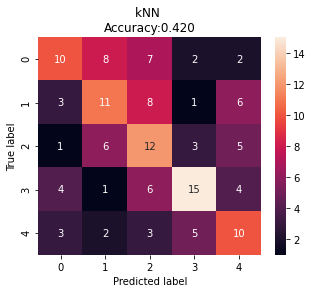

MAE  :  1.0072463768115942
MSE  :  1.5298953265321544


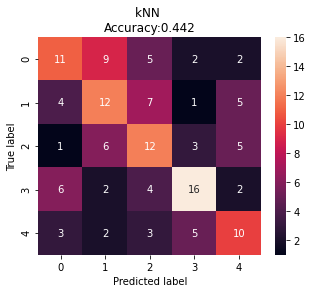

MAE  :  1.0507246376811594
MSE  :  1.5719460845568538


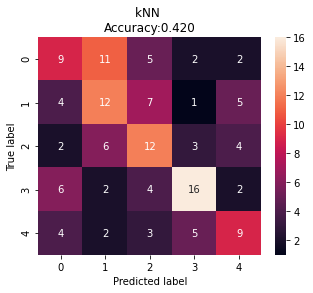

MAE  :  1.108695652173913
MSE  :  1.6307729117982896


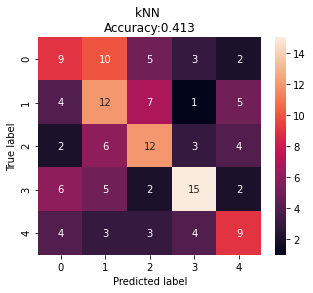

MAE  :  1.0434782608695652
MSE  :  1.5925551431765153


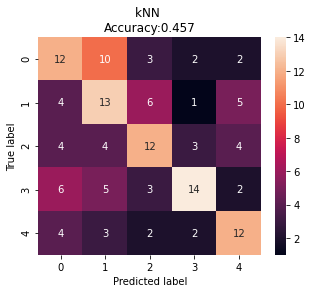

MAE  :  1.0434782608695652
MSE  :  1.5925551431765153


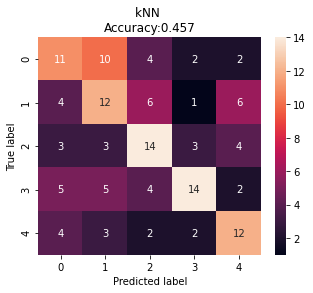

MAE  :  1.0434782608695652
MSE  :  1.5925551431765153


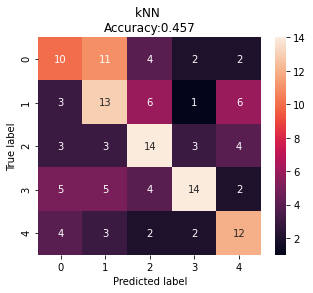

MAE  :  1.0
MSE  :  1.5369836826003425


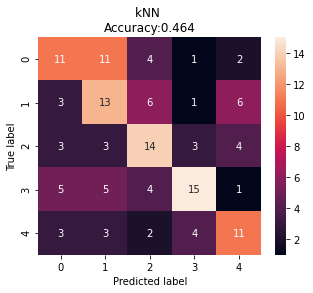

MAE  :  1.0
MSE  :  1.5369836826003425


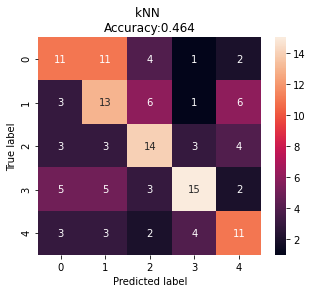

MAE  :  1.0
MSE  :  1.5369836826003425


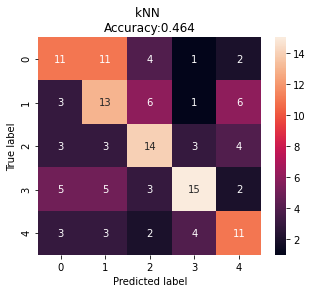

MAE  :  0.9782608695652174
MSE  :  1.5251514536339463


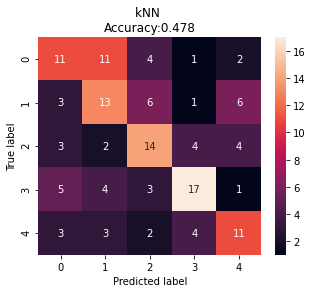

MAE  :  0.9782608695652174
MSE  :  1.5251514536339463


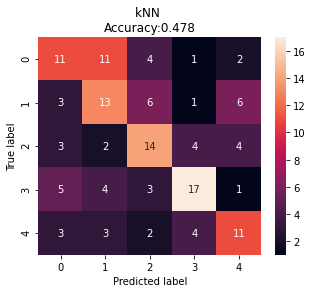

MAE  :  0.9782608695652174
MSE  :  1.5251514536339463


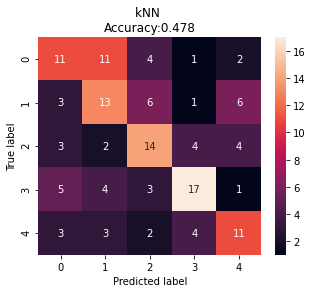

MAE  :  0.9782608695652174
MSE  :  1.5251514536339463


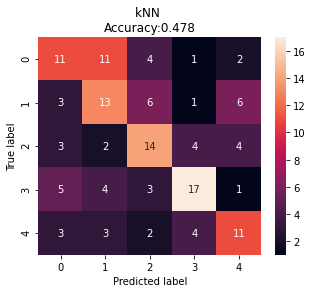

MAE  :  0.9927536231884058
MSE  :  1.553397398691291


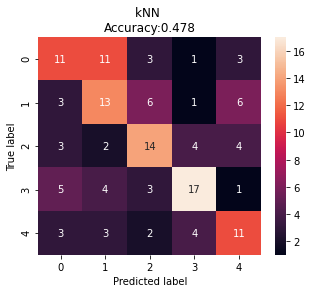

MAE  :  1.0144927536231885
MSE  :  1.5742493034984062


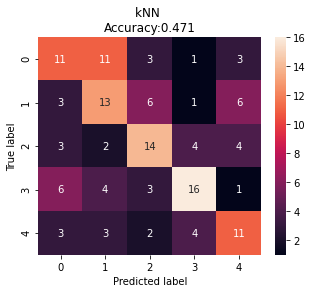

MAE  :  1.0144927536231885
MSE  :  1.5742493034984062


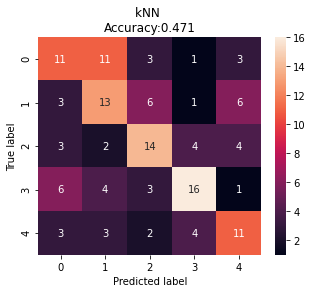

MAE  :  0.9782608695652174
MSE  :  1.5393392145304765


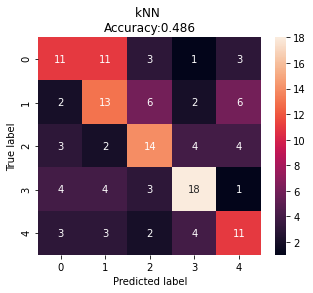

MAE  :  0.9637681159420289
MSE  :  1.515619163667233


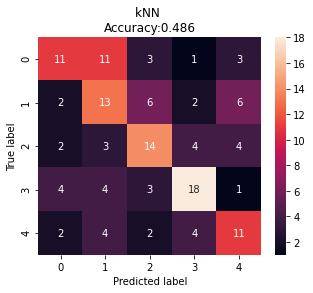

MAE  :  0.9637681159420289
MSE  :  1.515619163667233


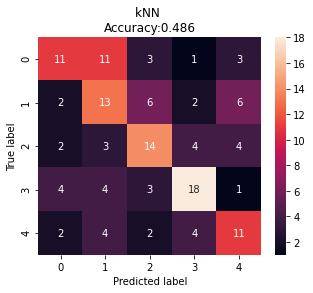

MAE  :  0.9782608695652174
MSE  :  1.5251514536339463


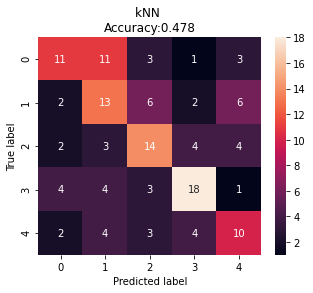

MAE  :  0.9782608695652174
MSE  :  1.5251514536339463


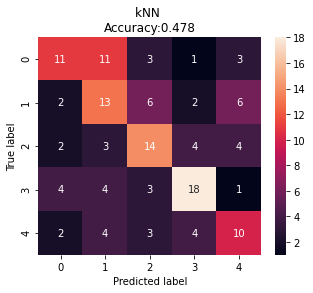

MAE  :  1.0
MSE  :  1.5369836826003425


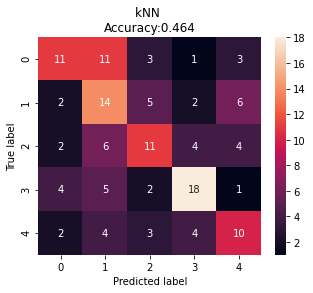

MAE  :  0.9855072463768116
MSE  :  1.5180078478344428


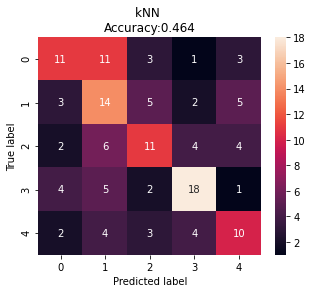

MAE  :  0.9855072463768116
MSE  :  1.5180078478344428


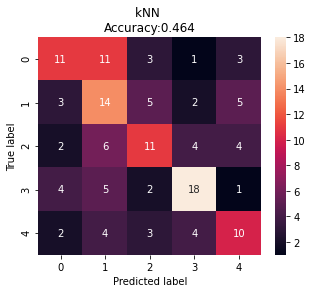

MAE  :  0.9855072463768116
MSE  :  1.5180078478344428


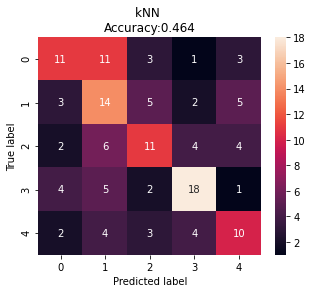

MAE  :  0.9637681159420289
MSE  :  1.5108304655560048


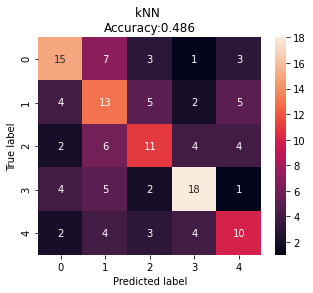

MAE  :  0.9492753623188406
MSE  :  1.491521934521722


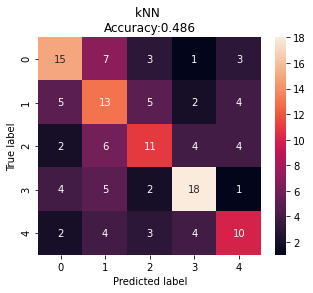

MAE  :  0.9202898550724637
MSE  :  1.4719601443879744


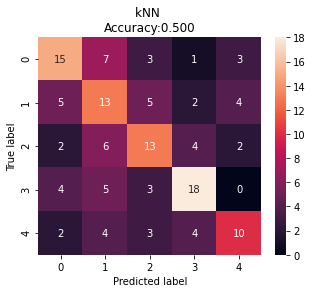

MAE  :  0.9202898550724637
MSE  :  1.4719601443879744


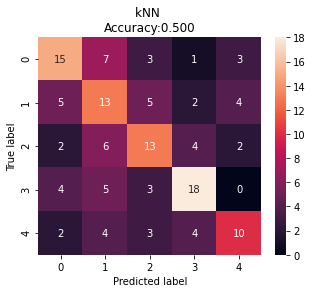

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


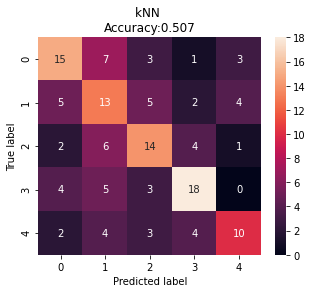

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


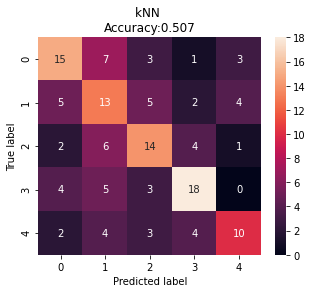

MAE  :  0.8768115942028986
MSE  :  1.4471361022898726


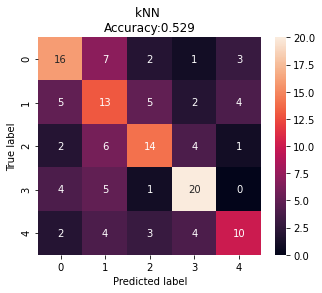

MAE  :  0.8768115942028986
MSE  :  1.4471361022898726


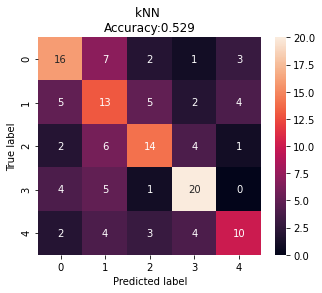

MAE  :  0.8695652173913043
MSE  :  1.4546277974057513


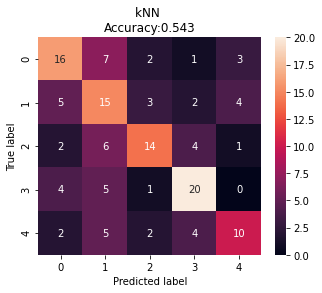

MAE  :  0.8695652173913043
MSE  :  1.4546277974057513


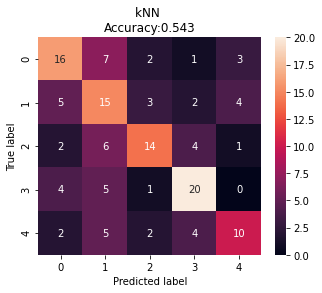

MAE  :  0.8768115942028986
MSE  :  1.457116469537388


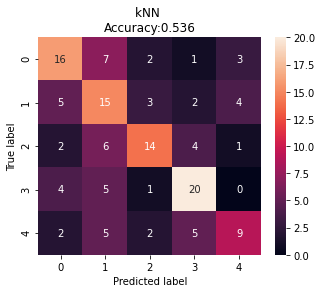

MAE  :  0.8623188405797102
MSE  :  1.442120017518492


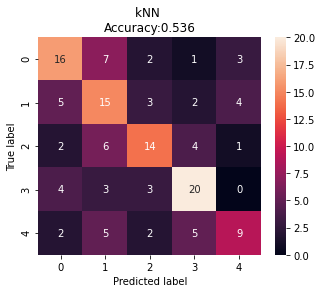

MAE  :  0.8623188405797102
MSE  :  1.442120017518492


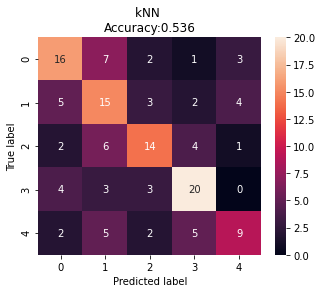

MAE  :  0.8623188405797102
MSE  :  1.442120017518492


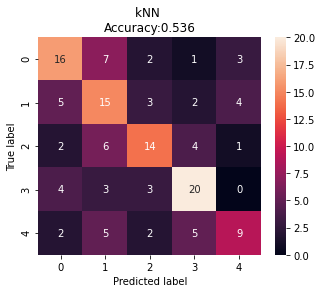

MAE  :  0.8623188405797102
MSE  :  1.442120017518492


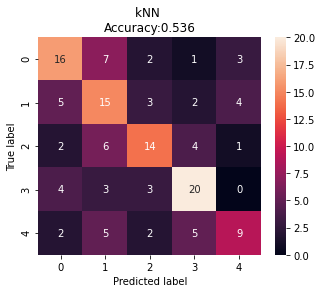

MAE  :  0.8623188405797102
MSE  :  1.442120017518492


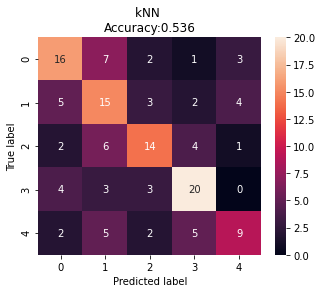

MAE  :  0.8768115942028986
MSE  :  1.4521348601882378


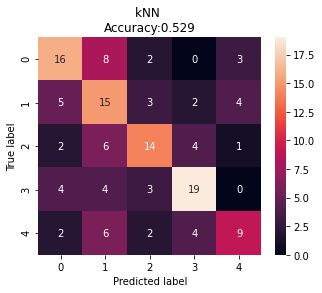

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


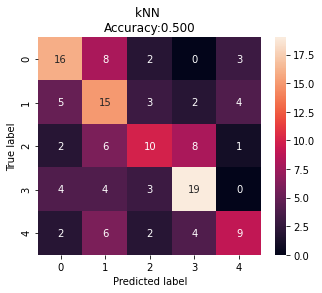

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


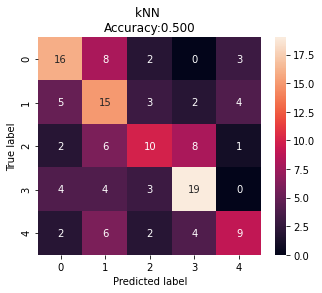

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


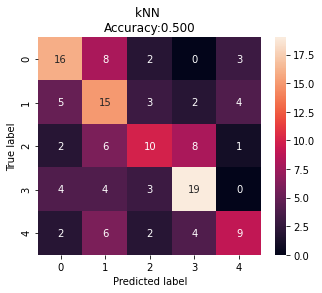

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


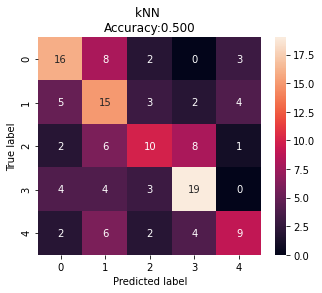

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


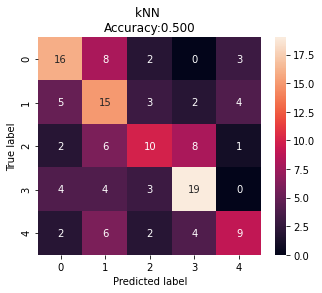

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


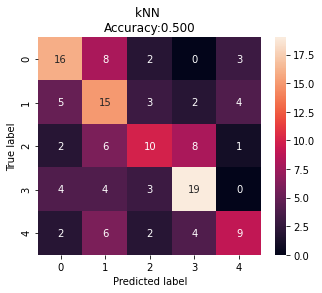

MAE  :  0.9057971014492754
MSE  :  1.4620811056231764


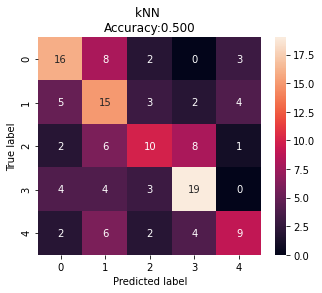

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

mae = []
mse = []
ac = []

for i in range(2,55):
    dtc = DecisionTreeClassifier(min_samples_split=i)
    dtc.fit(X_train, y_train)
    test_predictions = dtc.predict(X_test)
    cm = confusion_matrix(y_test, test_predictions)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, test_predictions)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ac.append(accuracy_score(y_test, test_predictions))
    err_mae = mean_absolute_error(y_test, test_predictions)
    mae.append(err_mae)
    err_mse = mean_squared_error(y_test, test_predictions, squared=False)
    mse.append(err_mse)
    print('MAE  : ', err_mae)
    print('MSE  : ', err_mse)
    plt.show()

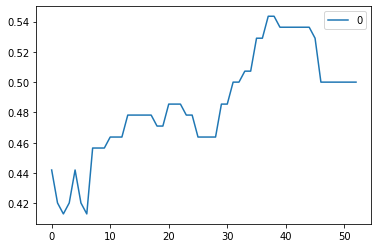

In [ ]:
dtc_curve = pd.DataFrame(ac)
dtc_curve.plot()

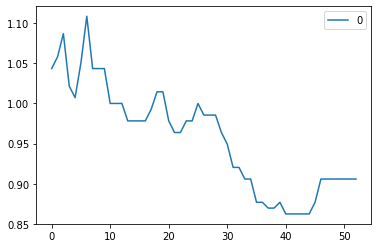

In [ ]:
dtc_curve1 = pd.DataFrame(mae)
dtc_curve1.plot()

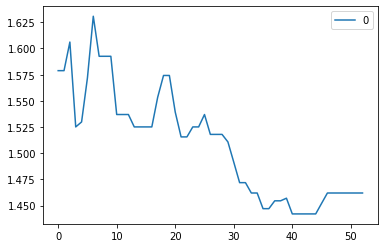

In [ ]:
dtc_curve2 = pd.DataFrame(mse)
dtc_curve2.plot()

In [21]:
bdtc = DecisionTreeClassifier(min_samples_split=40)
bdtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy :  0.5434782608695652
MAE  :  0.8695652173913043
MSE  :  1.4546277974057513


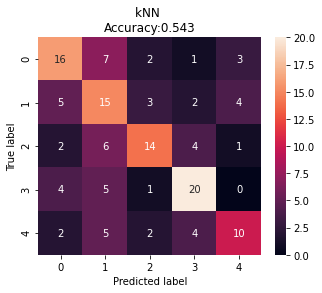

In [23]:
test_predictions = bdtc.predict(X_test)
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, test_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy : ', accuracy_score(y_test, test_predictions))
print('MAE  : ', mean_absolute_error(y_test, test_predictions))
print('MSE  : ', mean_squared_error(y_test, test_predictions, squared=False))
plt.show()

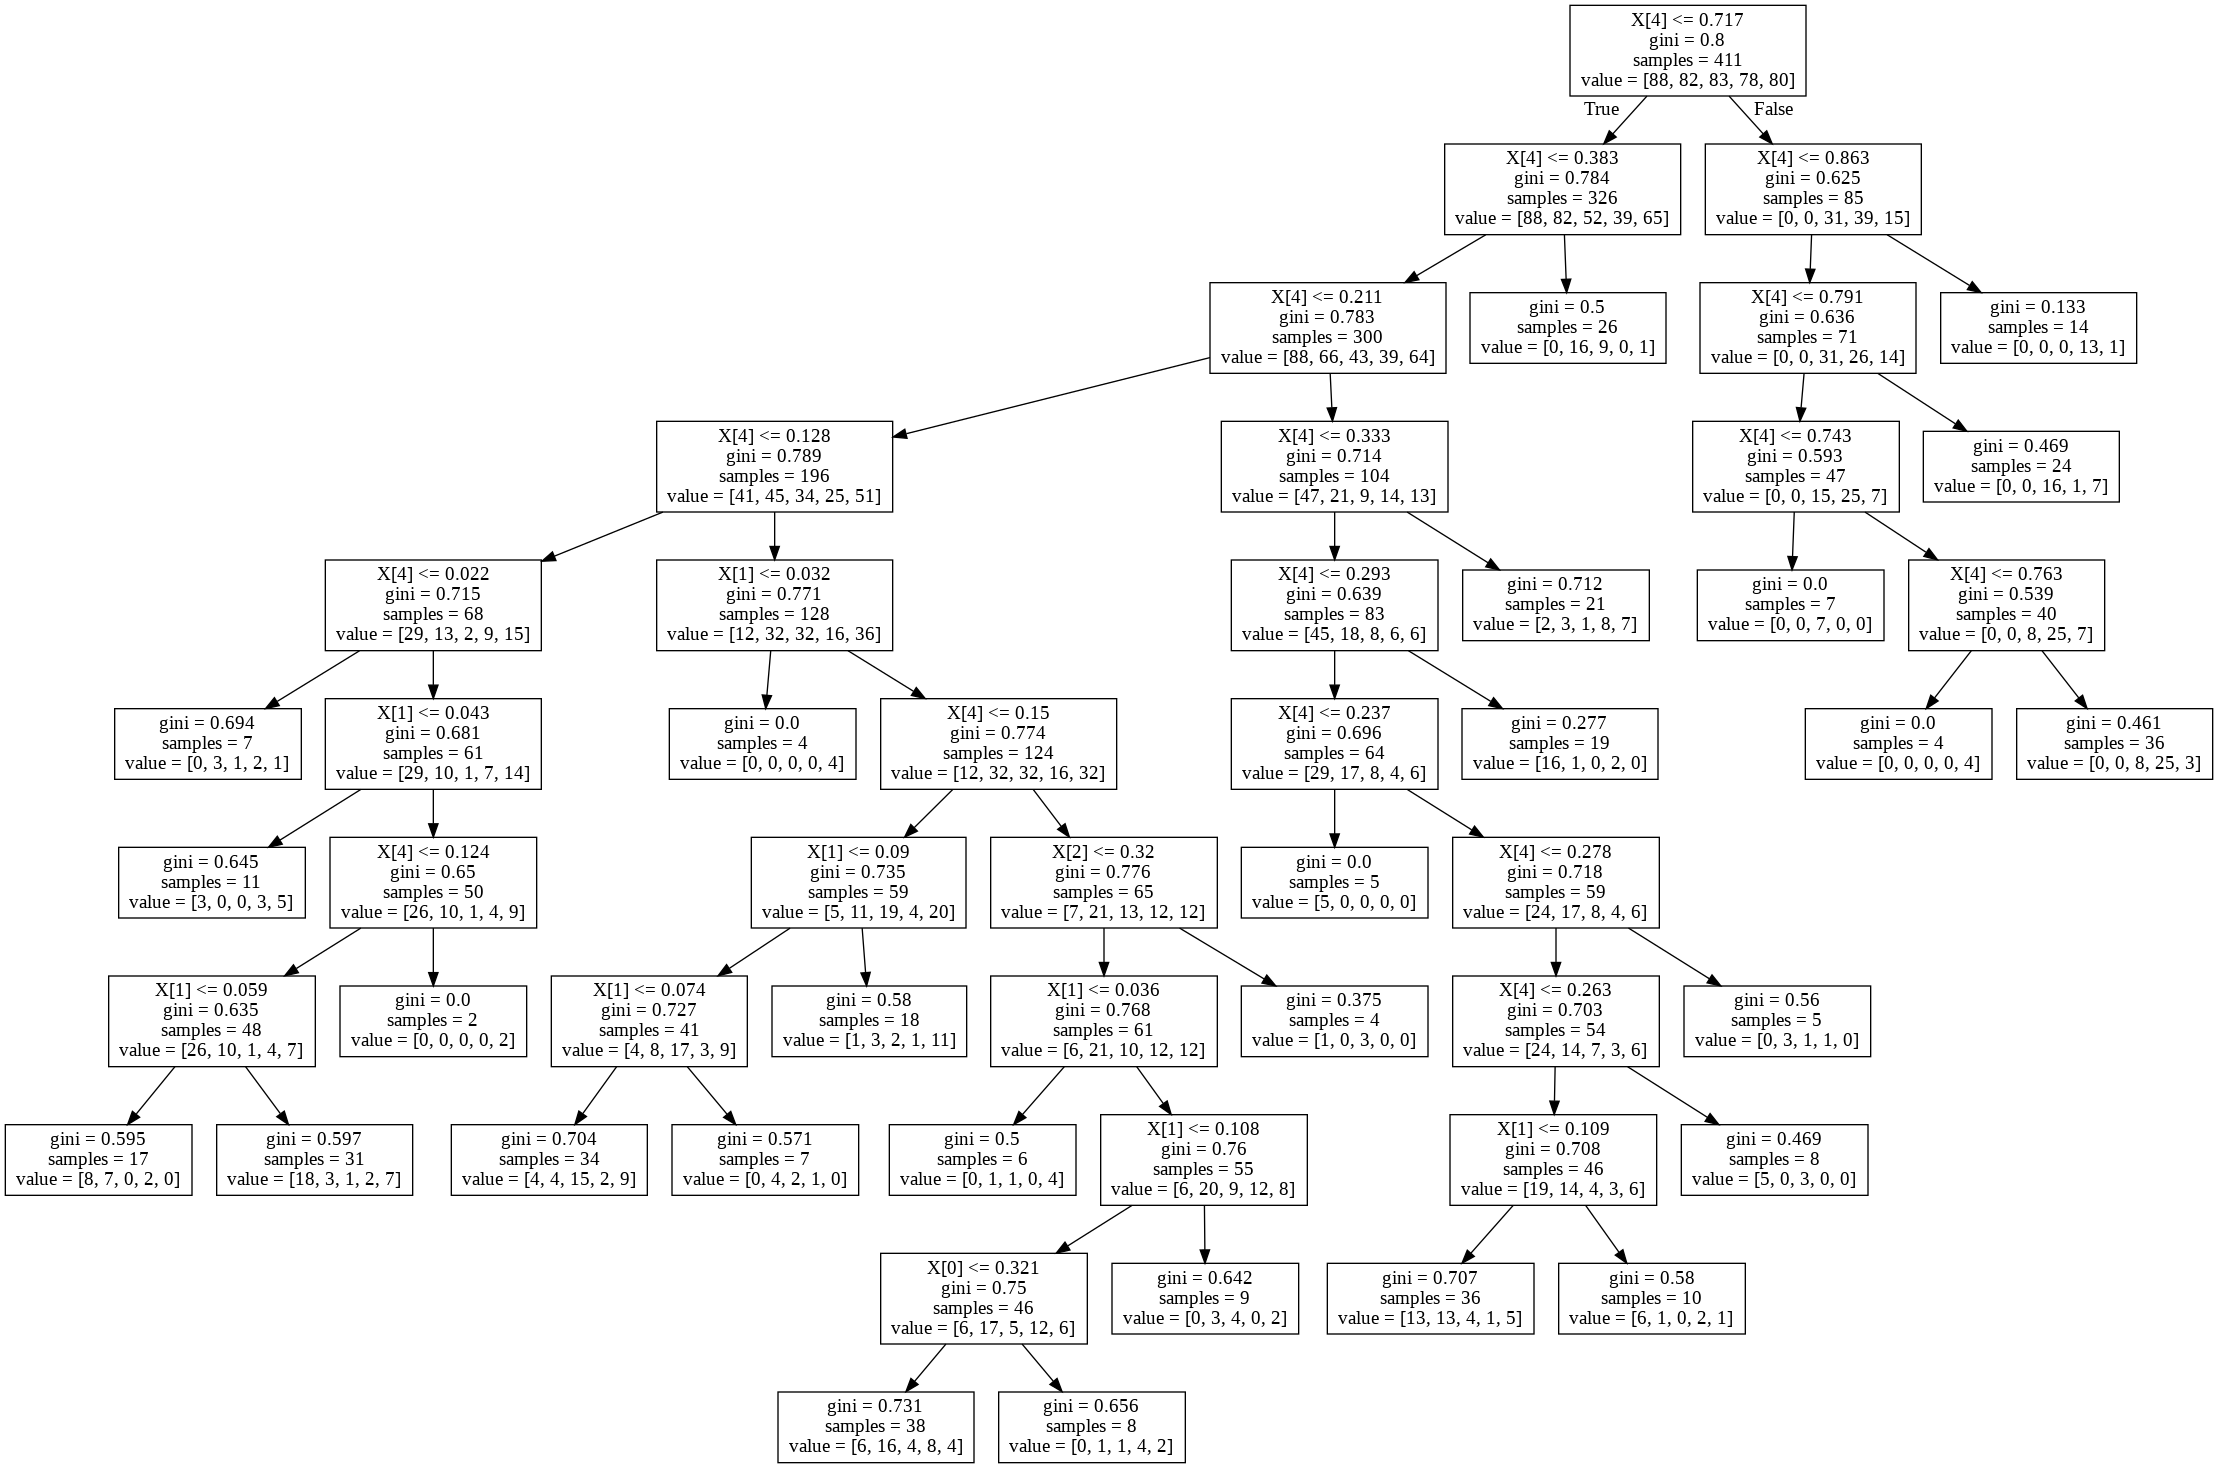

In [ ]:
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(bdtc, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#SVM

In [ ]:
from sklearn.svm import SVC

Cs = []
for i in range(1, 100):
    Cs.append(i)
    
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mae = []
mse = []
ac = []

for i in kernels:
    for j in Cs:
        svm = SVC(kernel=i, C=j).fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        ac.append(accuracy_score(y_test, y_pred))
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred, squared=False))
        print('\nAccuracy : ', accuracy_score(y_test, y_pred))
        print('MAE  : ', mean_absolute_error(y_test, y_pred))
        print('MSE  : ', mean_squared_error(y_test, y_pred, squared=False))


Accuracy :  0.35507246376811596
MAE  :  1.2753623188405796
MSE  :  1.8454801818088633

Accuracy :  0.37681159420289856
MAE  :  1.2173913043478262
MSE  :  1.7937088125857625

Accuracy :  0.38405797101449274
MAE  :  1.2028985507246377
MSE  :  1.7856107630448046

Accuracy :  0.391304347826087
MAE  :  1.1666666666666667
MSE  :  1.7466323705007758

Accuracy :  0.38405797101449274
MAE  :  1.181159420289855
MSE  :  1.7549102954075846

Accuracy :  0.37681159420289856
MAE  :  1.210144927536232
MSE  :  1.787638714593372

Accuracy :  0.37681159420289856
MAE  :  1.210144927536232
MSE  :  1.787638714593372

Accuracy :  0.3695652173913043
MAE  :  1.2173913043478262
MSE  :  1.7896643681776305

Accuracy :  0.3695652173913043
MAE  :  1.2173913043478262
MSE  :  1.7896643681776305

Accuracy :  0.3695652173913043
MAE  :  1.2173913043478262
MSE  :  1.7896643681776305

Accuracy :  0.3695652173913043
MAE  :  1.2173913043478262
MSE  :  1.7896643681776305

Accuracy :  0.3695652173913043
MAE  :  1.217391304347

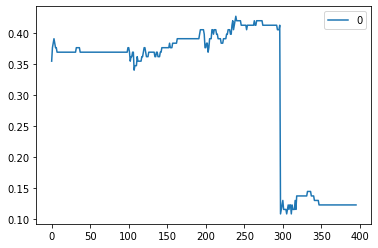

In [ ]:
curve = pd.DataFrame(ac)
curve.plot()

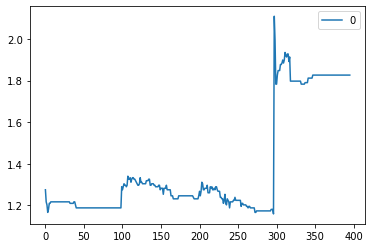

In [ ]:
curve1 = pd.DataFrame(mae)
curve1.plot()

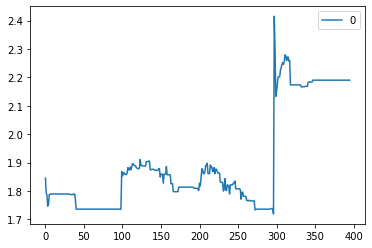

In [ ]:
curve2 = pd.DataFrame(mse)
curve2.plot()

Accuracy :  0.41304347826086957
MAE  :  1.2246376811594204
MSE  :  1.8197786137051262


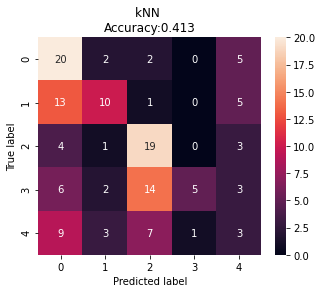

In [26]:
svm = SVC(kernel='rbf', C=40).fit(X_train, y_train)

y_pred = svm.predict(X_test)

plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('MAE  : ', mean_absolute_error(y_test, y_pred))
print('MSE  : ', mean_squared_error(y_test, y_pred, squared=False))
plt.show()

#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

iters = []
learning_rate_inits = [0.1, 0.01, 0.001, 0.0001]
solvers = ['lbfgs', 'sgd', 'adam']
max_iters = [200, 300, 400]

for i in range(1,2):
    iters.append((i*50,))

for i in range(1,2):
    for j in range(1,2):
        iters.append((i*50, j*50,))

for i in range(1,2):
    for j in range(1,2):
        for k in range(1,2):
            iters.append((i*50, j*50, k*50,))


In [ ]:
mae = []
mse = []
ac = []

for hd in iters:
    for lr in learning_rate_inits:
        for sl in solvers:
            for mx in max_iters:
                mlp = MLPClassifier(max_iter=mx, hidden_layer_sizes= hd, solver=sl, learning_rate_init=lr, random_state=5).fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                ac.append(accuracy_score(y_test, y_pred))
                mae.append(mean_absolute_error(y_test, y_pred))
                mse.append(mean_squared_error(y_test, y_pred, squared=False)) 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

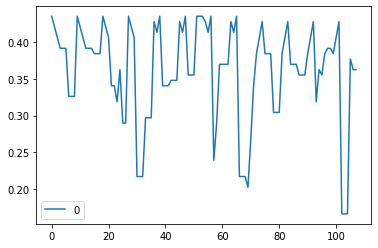

In [ ]:
curve = pd.DataFrame(ac)
curve.plot()

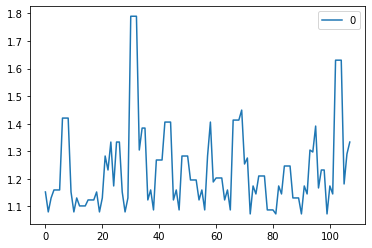

In [ ]:
curve1 = pd.DataFrame(mae)
curve1.plot()

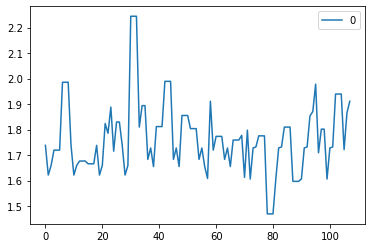

In [ ]:
curve2 = pd.DataFrame(mse)
curve2.plot()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy :  0.43478260869565216
MAE  :  1.1521739130434783
MSE  :  1.7383150262351132


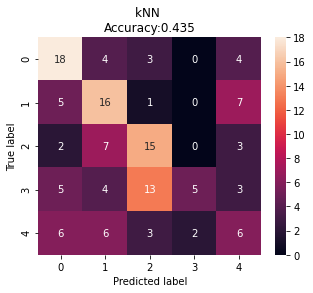

In [28]:
mlp = MLPClassifier(max_iter=200, hidden_layer_sizes= (50,), solver='lbfgs', learning_rate_init=0.001, random_state=5).fit(X_train, y_train)
y_pred = mlp.predict(X_test)

plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('MAE  : ', mean_absolute_error(y_test, y_pred))
print('MSE  : ', mean_squared_error(y_test, y_pred, squared=False))
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

mae = []
mse = []
ac = []

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
max_iters = [100, 200, 300]

Cs = []
Cs.append(1)
for i in range(1, 5):
    Cs.append(i*5)

for sl in solvers:
    for p in penalty:
        for c in Cs:
            for mx in max_iters:
                try:
                    lr = LogisticRegression(solver=sl, penalty=p, max_iter=mx, C=c).fit(X_train, y_train)
                    y_pred = lr.predict(X_test)
                    ac.append(accuracy_score(y_test, y_pred))
                    mae.append(mean_absolute_error(y_test, y_pred))
                    mse.append(mean_squared_error(y_test, y_pred, squared=False)) 
                except Exception as e:
                    pass

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

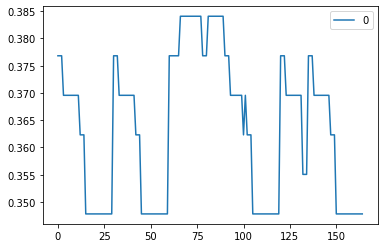

In [ ]:
curve = pd.DataFrame(ac)
curve.plot()

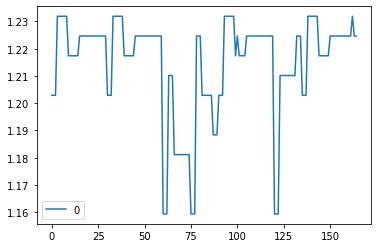

In [ ]:
curve1 = pd.DataFrame(mae)
curve1.plot()

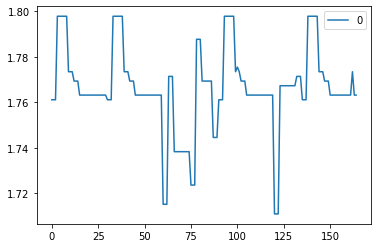

In [ ]:
curve2 = pd.DataFrame(mse)
curve2.plot()

Accuracy :  0.38405797101449274
MAE  :  1.181159420289855
MSE  :  1.7383150262351132


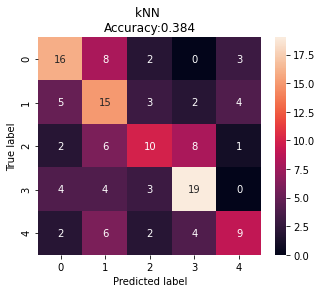

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1', max_iter=300, C=20).fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('MAE  : ', mean_absolute_error(y_test, y_pred))
print('MSE  : ', mean_squared_error(y_test, y_pred, squared=False))
plt.show()

#Neural Networks

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y=y_train, num_classes=5, dtype='float32')
y_test = to_categorical(y=y_test, num_classes=5, dtype='float32')

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

optimizers = ['sgd', 'adam']
denses = [32, 64, 128, 256]
ac = []
for op in optimizers:
    for d1 in denses:
        for d2 in denses:
            for d3 in denses:
                model = Sequential()
                model.add(Dense(d1, input_dim=5))
                model.add(Activation("relu"))
                model.add(Dropout(0.5))
                model.add(Dense(d2))
                model.add(Activation("relu"))
                model.add(Dropout(0.5))
                model.add(Dense(d3))
                model.add(Activation("relu"))
                model.add(Dropout(0.5))
                model.add(Dense(5))
                model.add(Activation("softmax"))

                model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])

                model.fit(X_train, y_train, batch_size=64, epochs=300)
                ac.append(model.evaluate(x=X_test, y=y_test, batch_size=64)[1])

Streaming output truncated to the last 5000 lines.
Epoch 210/300
7/7 [==============================] - 0s 6ms/step - loss: 1.3421 - accuracy: 0.4209
Epoch 211/300
7/7 [==============================] - 0s 5ms/step - loss: 1.3449 - accuracy: 0.4088
Epoch 212/300
7/7 [==============================] - 0s 4ms/step - loss: 1.3561 - accuracy: 0.4039
Epoch 213/300
7/7 [==============================] - 0s 4ms/step - loss: 1.3342 - accuracy: 0.4185
Epoch 214/300
7/7 [==============================] - 0s 4ms/step - loss: 1.3247 - accuracy: 0.4355
Epoch 215/300
7/7 [==============================] - 0s 4ms/step - loss: 1.3078 - accuracy: 0.4331
Epoch 216/300
7/7 [==============================] - 0s 4ms/step - loss: 1.3371 - accuracy: 0.3771
Epoch 217/300
7/7 [==============================] - 0s 5ms/step - loss: 1.3143 - accuracy: 0.4039
Epoch 218/300
7/7 [==============================] - 0s 4ms/step - loss: 1.3279 - accuracy: 0.3942
Epoch 219/300
7/7 [==============================] - 0s 4m

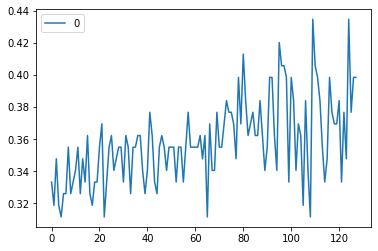

In [ ]:
curve = pd.DataFrame(ac)
curve.plot()

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=5))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64, epochs=300)
model.evaluate(x=X_test, y=y_test, batch_size=64)

Epoch 1/300
7/7 [==============================] - 0s 3ms/step - loss: 1.6058 - accuracy: 0.2214
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 1.6065 - accuracy: 0.2117
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 1.6017 - accuracy: 0.2482
Epoch 4/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5813 - accuracy: 0.2603
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5779 - accuracy: 0.2555
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5789 - accuracy: 0.2628
Epoch 7/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5761 - accuracy: 0.2457
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5564 - accuracy: 0.2944
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5571 - accuracy: 0.3041
Epoch 10/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5450 - accuracy: 0.2725
Epoch 11/300
7/7 [===========

[1.4277461767196655, 0.4275362193584442]

#Best Model

Accuracy :  0.5434782608695652
MAE  :  0.8695652173913043
MSE  :  1.4546277974057513


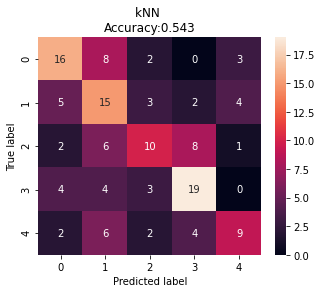

In [ ]:
test_predictions = bdtc.predict(X_test)
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, test_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy : ', accuracy_score(y_test, test_predictions))
print('MAE  : ', mean_absolute_error(y_test, test_predictions))
print('MSE  : ', mean_squared_error(y_test, test_predictions, squared=False))
plt.show()

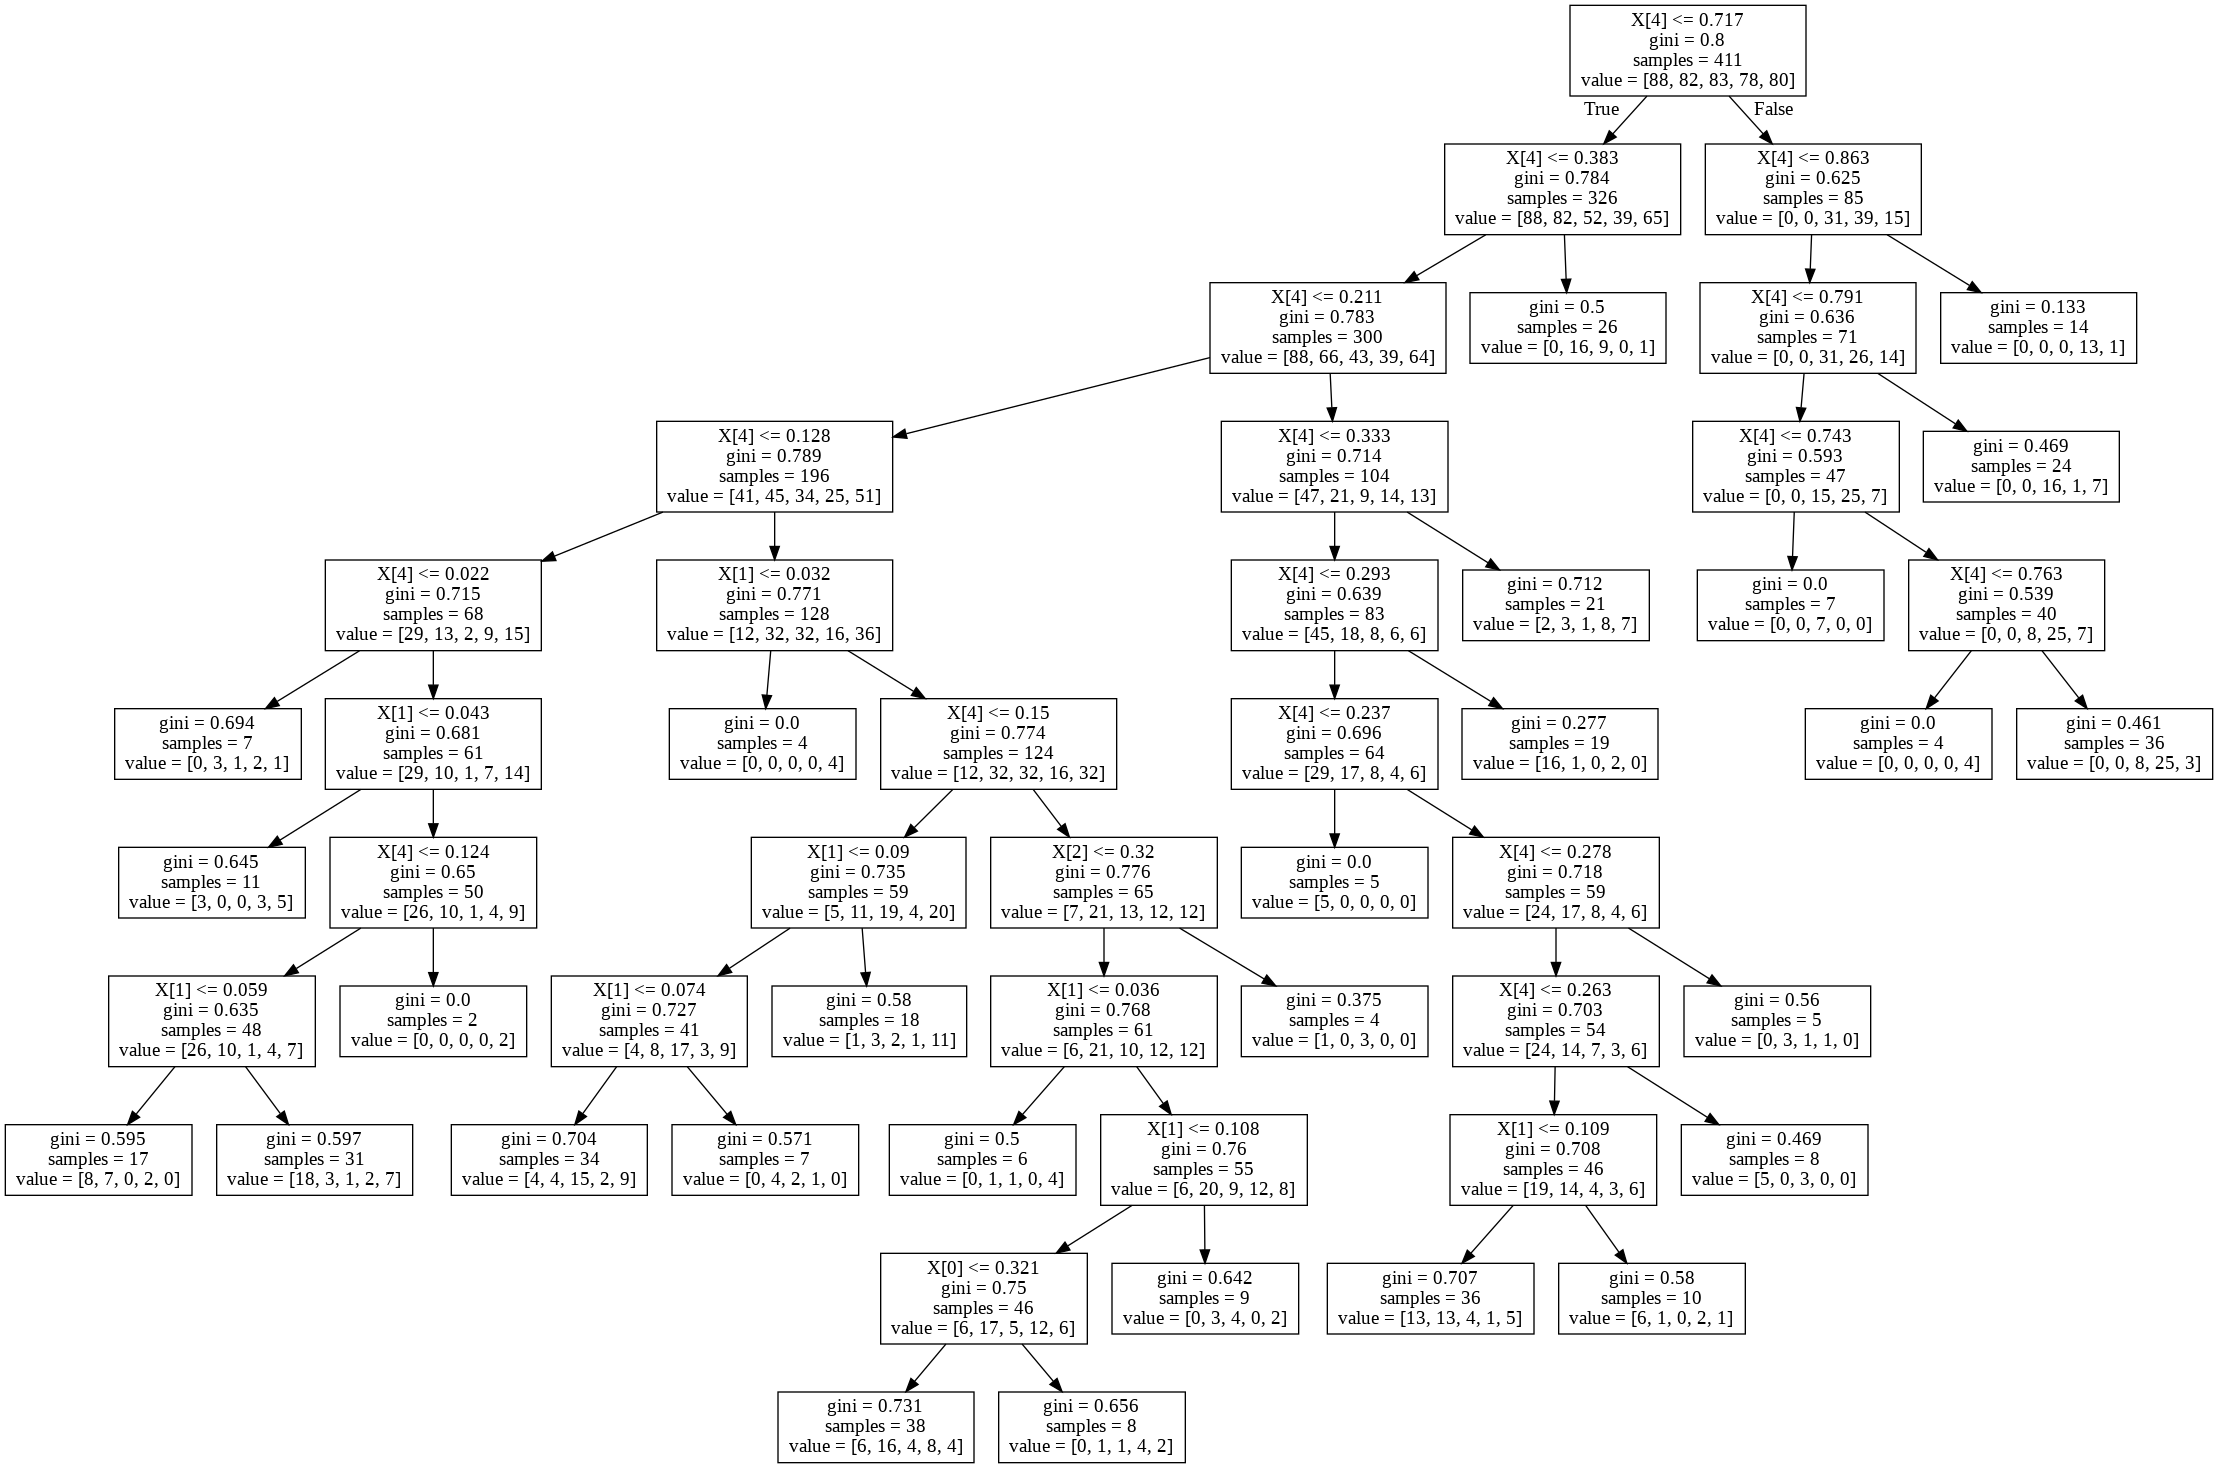

In [ ]:
dot_data = tree.export_graphviz(bdtc, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())